## US Adult Income
**Dataset of adult income** <br></br>
*DataSet Overveiw*

- Each row is labelled as either having a salary greater than **">50K" or "<=50K"**.
- This Data set is split into two CSV files, named adult-training.csv and adult-test.csv. <br></br>
**To Build a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.**
- **categorical_columns = [workclass, education, marital_status, occupation, relationship, race, gender, native_country]**
- **continuous_columns = [age, education_num, capital_gain, capital_loss, hours_per_week]**
- **A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))**

Prediction task is to determine whether a person makes over 50K a year. 
- Dataset Source: https://archive.ics.uci.edu/ml/datasets/census+income, http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

train_file = "/home/tejakummarikuntla/Dev/EDA/Salary_Prediction/us-census-data/adult-training.csv"
test_file = "/home/tejakummarikuntla/Dev/EDA/Salary_Prediction/us-census-data/adult-test.csv"

columns = ['Age','Workclass','fnlgwt','Education','Education_num','Marital_Status',
           'Occupation','Relationship','Race','Sex','Capital_Gain','Capital_Loss',
           'Hours/Week','Native_country','Income']

In [33]:
train = pd.read_csv(train_file, names=columns)
train.head()

,Age,Workclass,fnlgwt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours/Week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education_num     32561 non-null int64
Marital_Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital_Gain      32561 non-null int64
Capital_Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native_country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [48]:
train.shape

(32561, 15)

In [35]:
train.describe()

,Age,fnlgwt,Education_num,Capital_Gain,Capital_Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [39]:
# Replacing '?' with nan 
train.replace(' ?', np.nan, inplace=True)

In [40]:
train.isnull().sum()

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education_num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours/Week           0
Native_country     583
Income               0
dtype: int64

#### Missing Data:
Workclass(1836), Occupation(1843), Native_country(583) <br></br>
All belongs to Categorical data

In [44]:
train['Income'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

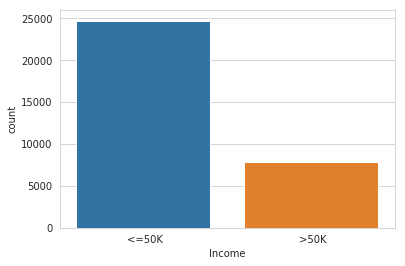

In [61]:
sns.countplot(train['Income'])
plt.show()

Dataset is Imbalenced with Majority class label <=50k.
- **75.91%** data points labeled <=50k
- **24.08%** data points labeled <50k

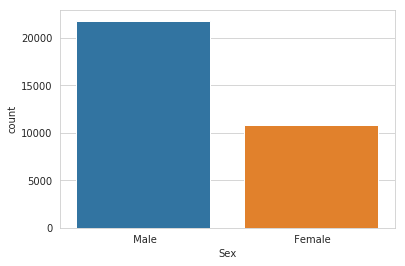

In [62]:
# Gender distribution
sns.countplot(train['Sex'])
plt.show()

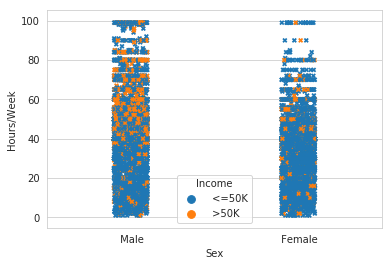

In [54]:
sns.stripplot(x='Sex', y='Hours/Week', data=train,hue='Income',marker='X')

[Text(0, 0, ' State-gov'),
 Text(0, 0, ' Self-emp-not-inc'),
 Text(0, 0, ' Private'),
 Text(0, 0, ' Federal-gov'),
 Text(0, 0, ' Local-gov'),
 Text(0, 0, ' Self-emp-inc'),
 Text(0, 0, ' Without-pay'),
 Text(0, 0, ' Never-worked')]

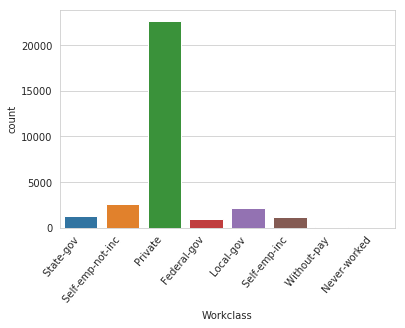

In [73]:
# Workclass
wclass_plot = sns.countplot(train['Workclass'])
wclass_plot.set_xticklabels( wclass_plot.get_xticklabels(),rotation=50, ha="right")

Private class working people are overall High

In [76]:
train['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

[Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Transport-moving'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Priv-house-serv')]

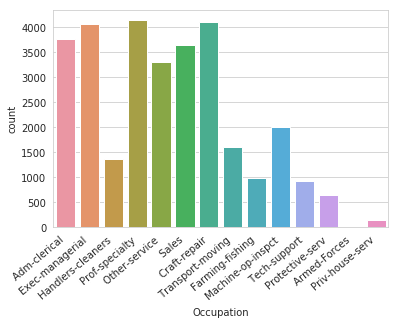

In [82]:
# Occupation
occ_plot = sns.countplot(train['Occupation'])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=40, ha="right")

[Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Transport-moving'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Priv-house-serv')]

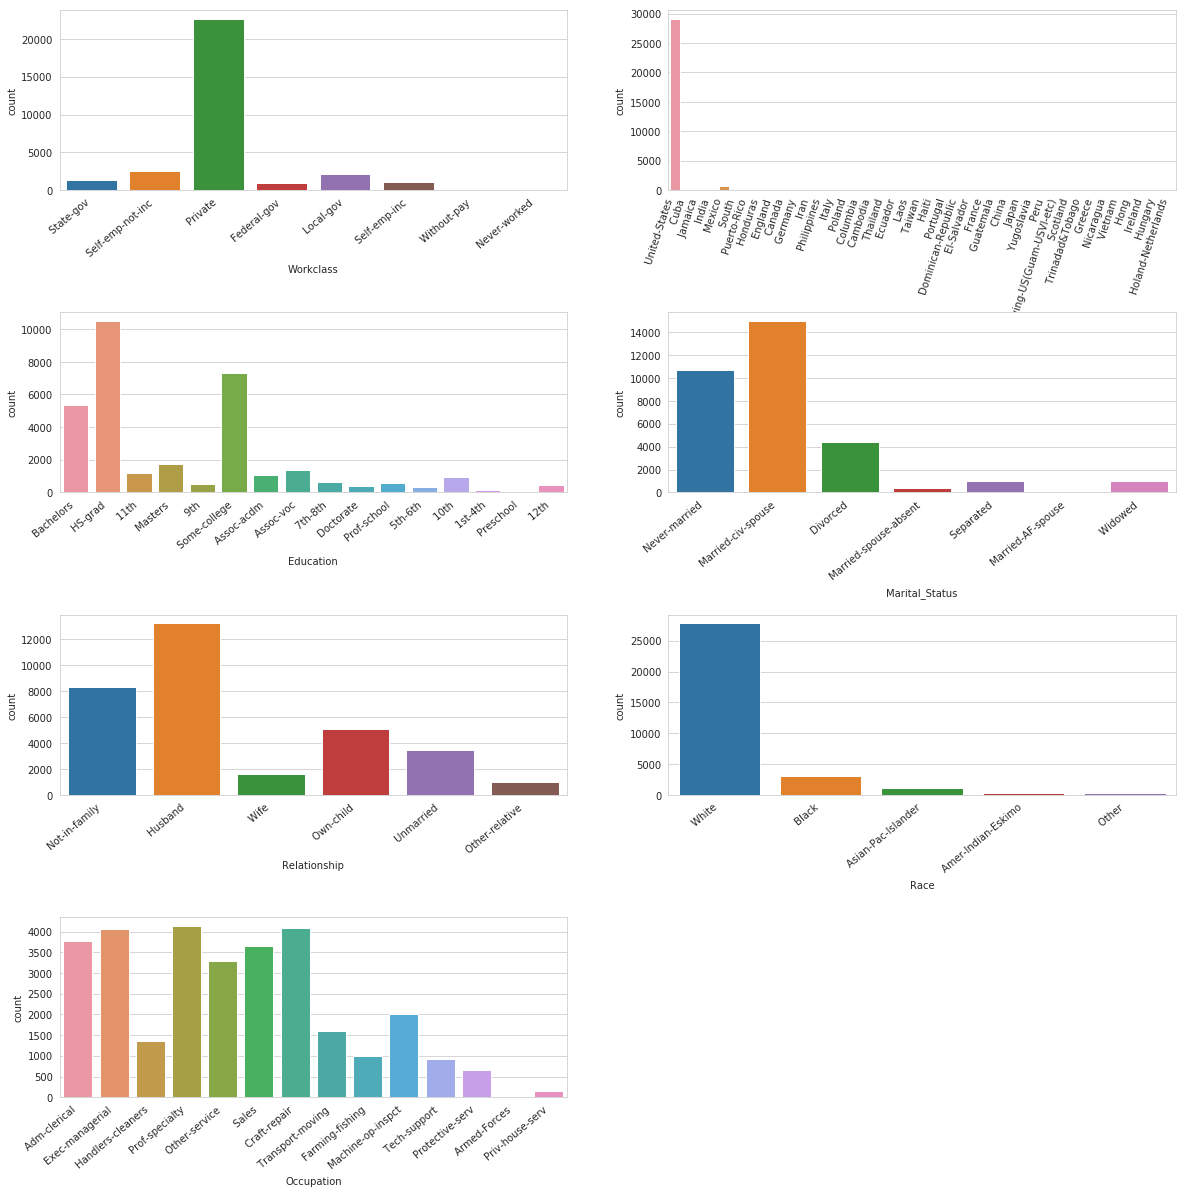

In [84]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[3][1])


# Workclass
wc_plot = sns.countplot(train['Workclass'], ax=axs[0][0])
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=40, ha="right")

# Native country
nc_plot = sns.countplot(train['Native_country'], ax=axs[0][1])
nc_plot.set_xticklabels(nc_plot.get_xticklabels(), rotation=72, ha="right")

# Education
ed_plot = sns.countplot(train['Education'], ax=axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation=40, ha="right")

# Marital status
ms_plot = sns.countplot(train['Marital_Status'], ax=axs[1][1])
ms_plot.set_xticklabels(ms_plot.get_xticklabels(), rotation=40, ha="right")

# Relationship
rel_plot = sns.countplot(train['Relationship'], ax=axs[2][0])
rel_plot.set_xticklabels(rel_plot.get_xticklabels(), rotation=40, ha="right")

# Race
race_plot = sns.countplot(train['Race'], ax=axs[2][1])
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation=40, ha="right")

# Occupation
occ_plot = sns.countplot(train['Occupation'], ax=axs[3][0])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=40, ha="right")

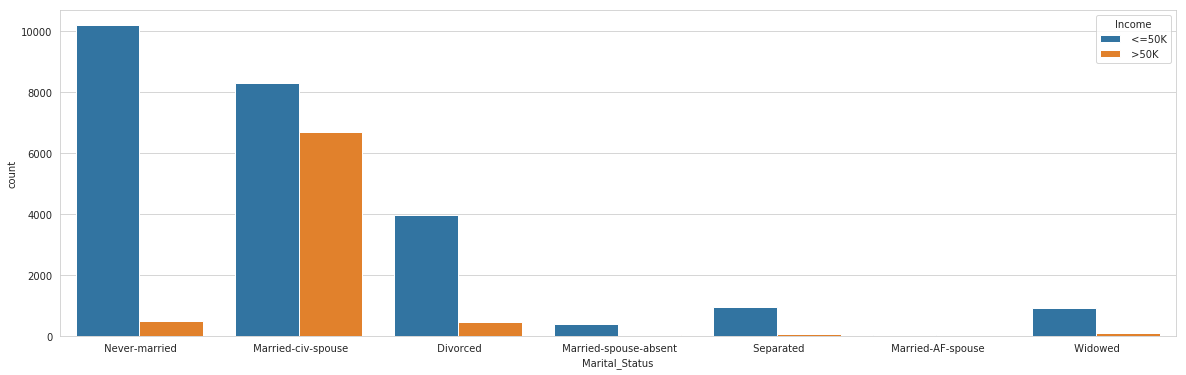

In [87]:
plt.figure(figsize=(20, 6))
sns.countplot(train['Marital_Status'], hue=train['Income'])

Most of the Never Married people are under Income of <=50k

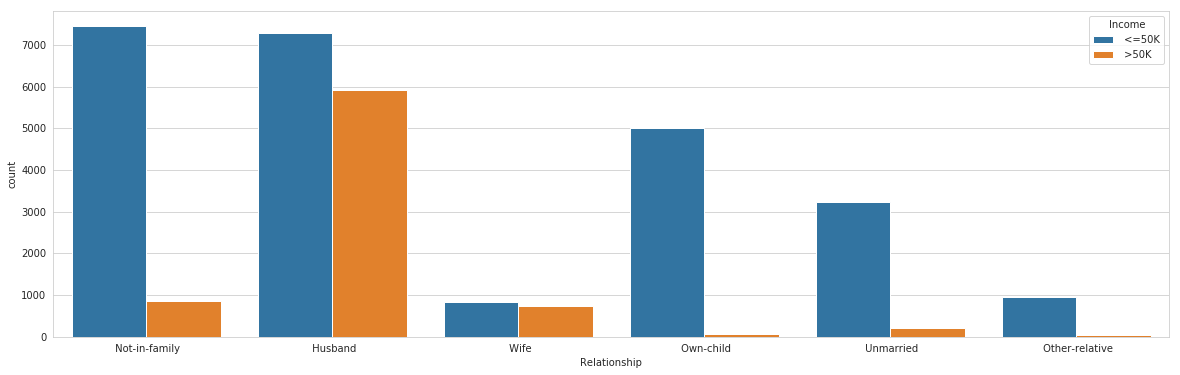

In [103]:
plt.figure(figsize=(20, 6))
sns.countplot(train['Relationship'], hue=train['Income'])

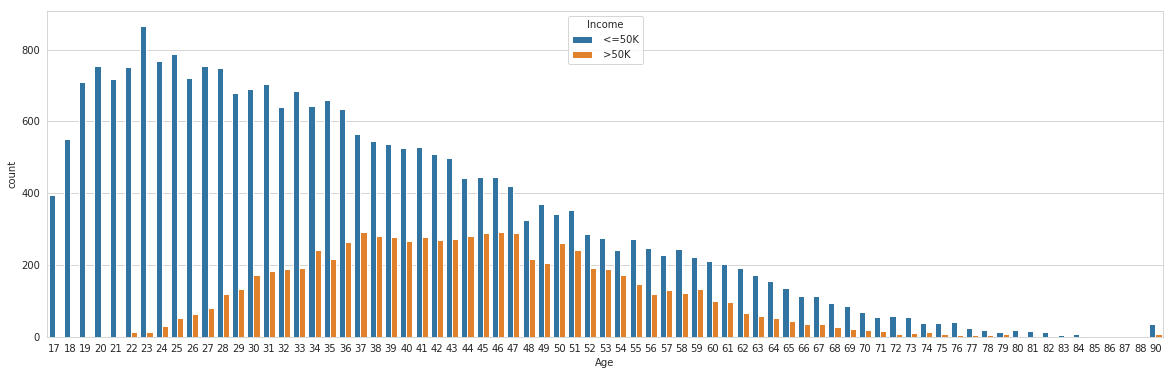

In [104]:
plt.figure(figsize=(20, 6))
sns.countplot(train['Age'], hue=train['Income'])

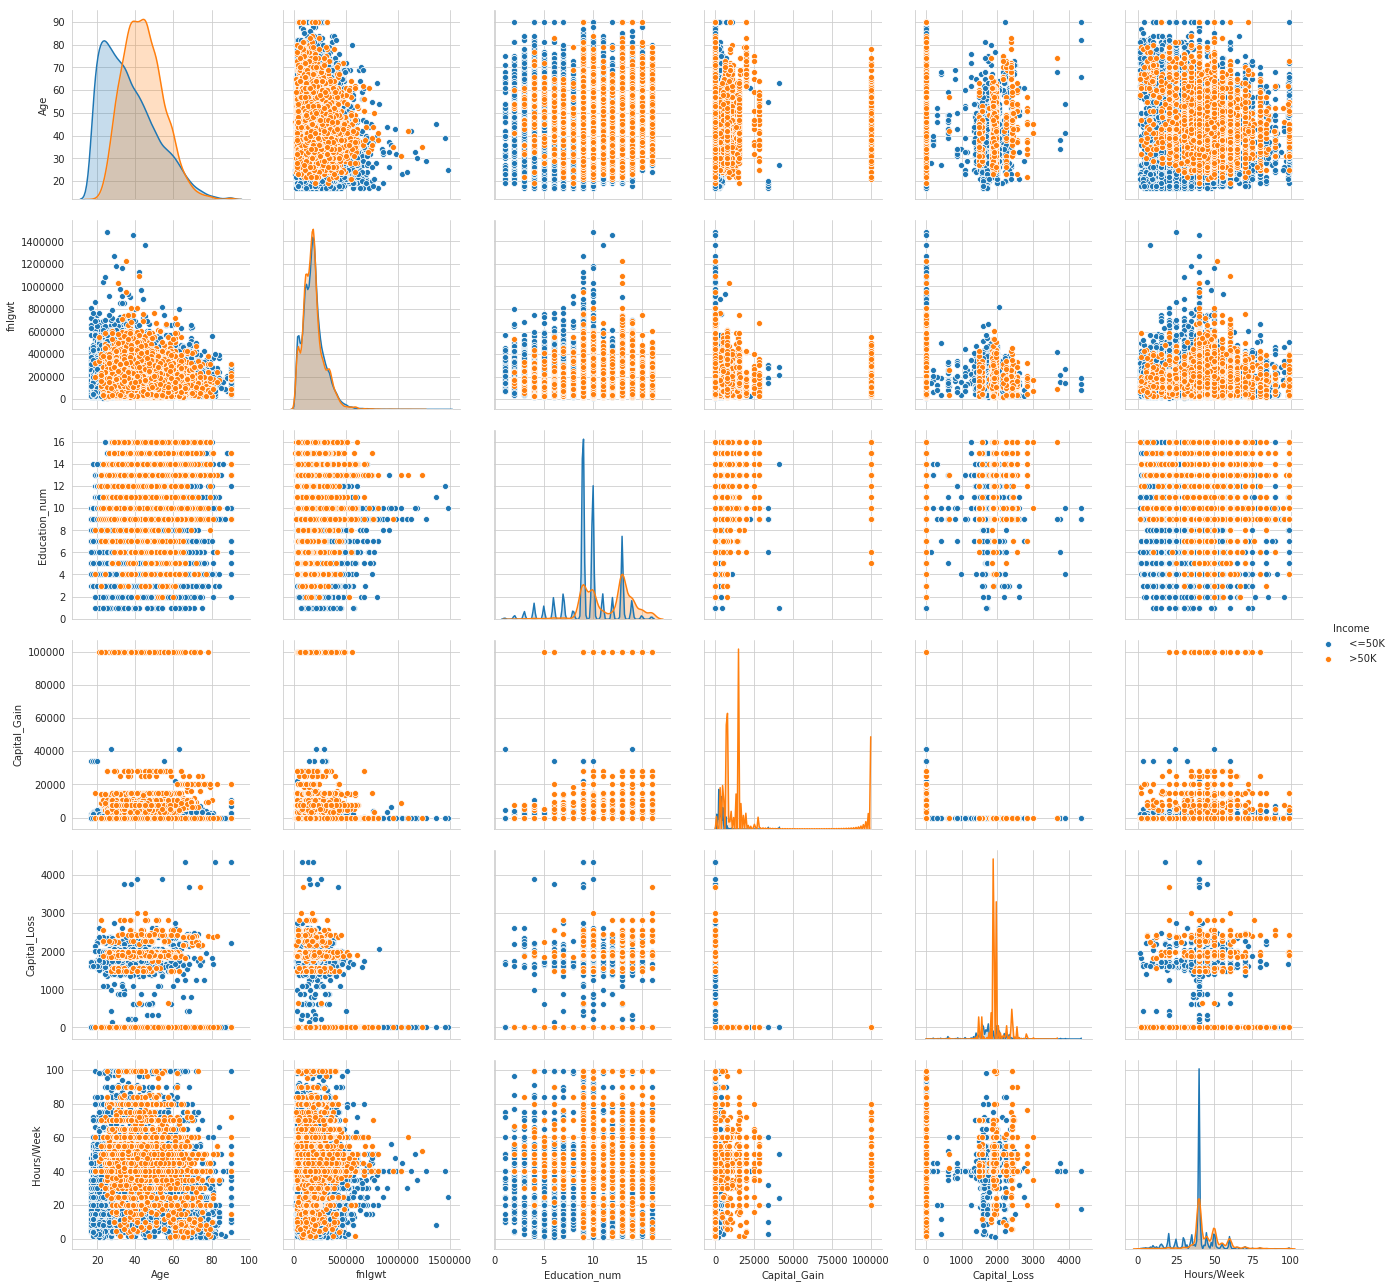

In [107]:
sns.set_style("whitegrid")
sns.pairplot(train, hue="Income", size=3)
plt.show()

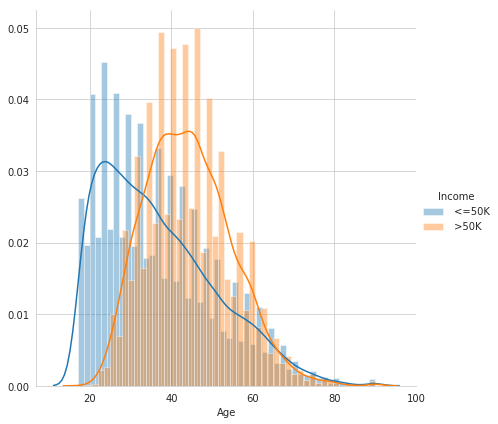

In [113]:
sns.FacetGrid(train, hue="Income", size=6) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

KeyError: "None of [Index([AxesSubplot(0.125,0.71587;0.352273x0.16413), AxesSubplot(0.547727,0.71587;0.352273x0.16413)], dtype='object')] are in the [columns]"

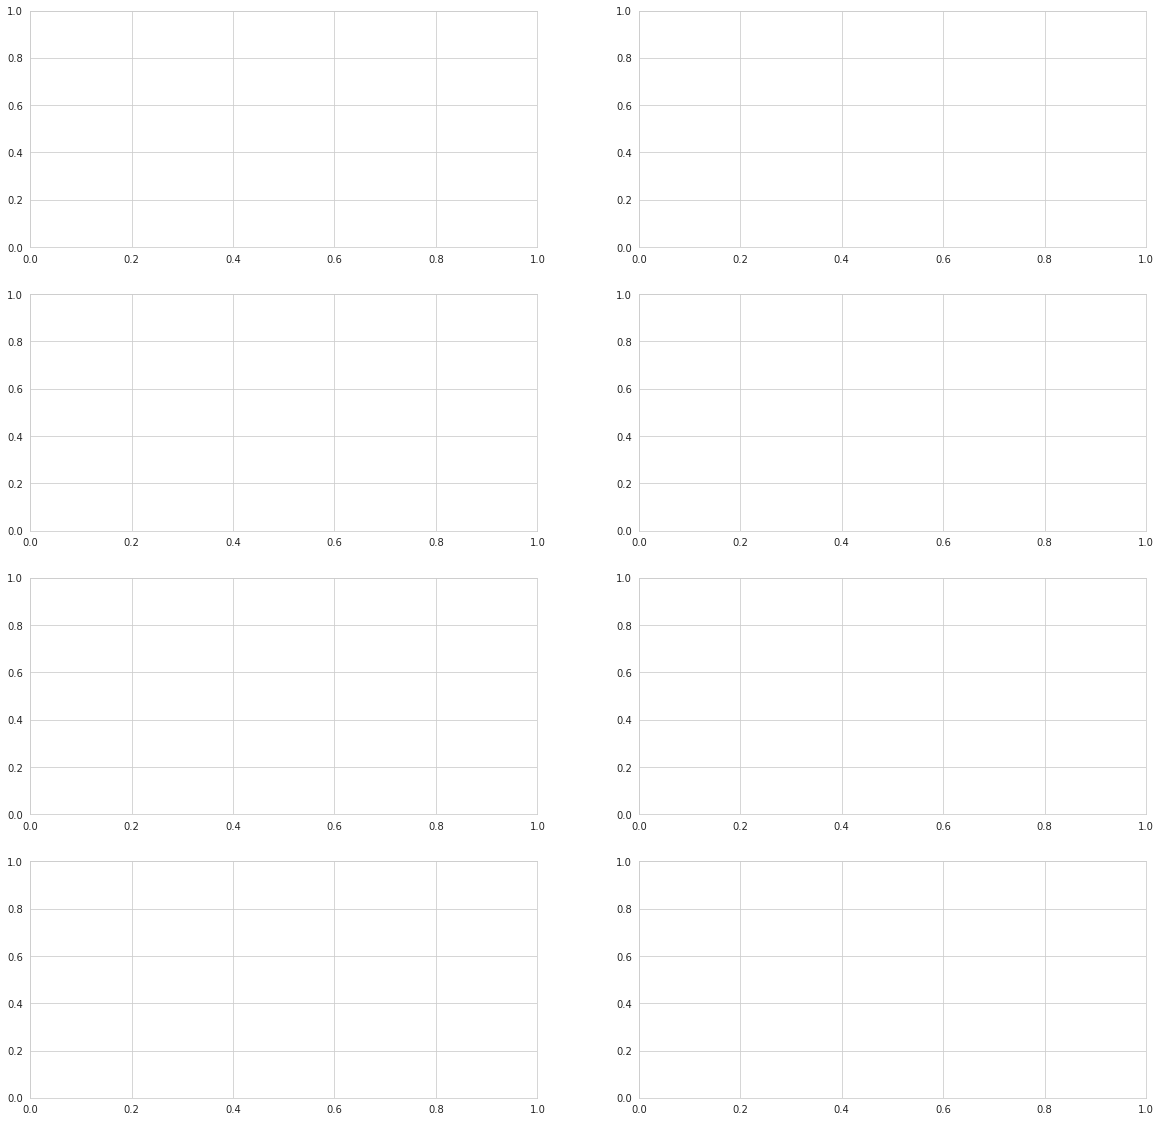

In [116]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
#plt.subplots_adjust(hspace=0.68)
#fig.delaxes(axs[3][1])

# Workclass
#wc_plot = sns.countplot(train['Workclass'], ax=axs[0][0])
#wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=40, ha="right")

sns.FacetGrid(train, hue="Income", size=6, row=axs[0], col=axs[0]) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();